In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib notebook

In [2]:
pip install spsa

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import matplotlib
# matplotlib.use('WXAgg')
from spsa import Parameters, SPSA, rho, cond_num
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly

import time


Version: 0.1.3


# SPSA from file

## 2 sensors

In [4]:
%matplotlib notebook

In [5]:
par = Parameters()

par.n = 5  # number of sensors
par.N = {i for i in range(1, par.n + 1)}  # indexes of sensors
par.s = {1: np.array([1, 2]),  # sensors coordinates
         2: np.array([3, 20]),
         3: np.array([10, 3]),
         4: np.array([20, 3]),
         5: np.array([3, 10])}
par.s_norms = {i: sum(val * val) for i, val in par.s.items()}

par.m = 1  # nuber of targets
par.M = {i for i in range(1, par.m + 1)}  # targets indexes
par.r = {1: np.array([40, 40])}  # targets coordinates
par.theta = np.array([val for key, val in par.r.items()])  # searching for

par.meas = {1: {
    1: rho(par.r.get(1), par.s.get(1)),  # measurments  from target to sensor
    2: rho(par.r.get(1), par.s.get(2)),
    3: rho(par.r.get(1), par.s.get(3)),
    4: rho(par.r.get(1), par.s.get(4)),
    5: rho(par.r.get(1), par.s.get(5))
}
}

par.init_coord = np.array([5, 5])  # r estimations

par.d = 2  # number of dimensions

par.beta_1 = 0.5
par.beta_2 = 0.5
par.beta = par.beta_1 + par.beta_2

par.alpha = 1 / 4
par.gamma = 1 / 4

par.weight = np.array([[3., -1., -1., -1., 0.],
                       [-1., 3., 0., -1., -1.],
                       [-1., 0., 1., 0., 0.],
                       [-1., -1., 0., 3., -1.],
                       [0., -1., 0., -1., 2.]])

par.b = 1

In [6]:
def generate_matrix(n):
    raw_mat = np.random.rand(n, n)
    weight = np.tril(raw_mat) + np.tril(raw_mat, -1).T

    weight = np.around(weight, 1)
    np.fill_diagonal(weight, 0)
    weight = - weight + np.diag([n-1]*n)
    return weight


par.weight = generate_matrix(5)
cond = cond_num(par.weight)
max_c = 0
while max_c < 5:
    par.weight = generate_matrix(5)
    if cond_num(par.weight) > max_c:
        max_c = cond_num(par.weight)
        w = par.weight

# cond_num(par.weight), par.weight

max_c, w

(5.090022754320819,
 array([[ 4. , -0.3, -0.4, -0.8, -0.8],
        [-0.3,  4. , -0.9, -0.8, -0.9],
        [-0.4, -0.9,  4. , -0.9, -0.7],
        [-0.8, -0.8, -0.9,  4. , -0.9],
        [-0.8, -0.9, -0.7, -0.9,  4. ]]))



Main method

Previous condition number: 5.090022754320819
 New condition number: 5.090022754320819


<IPython.core.display.Javascript object>


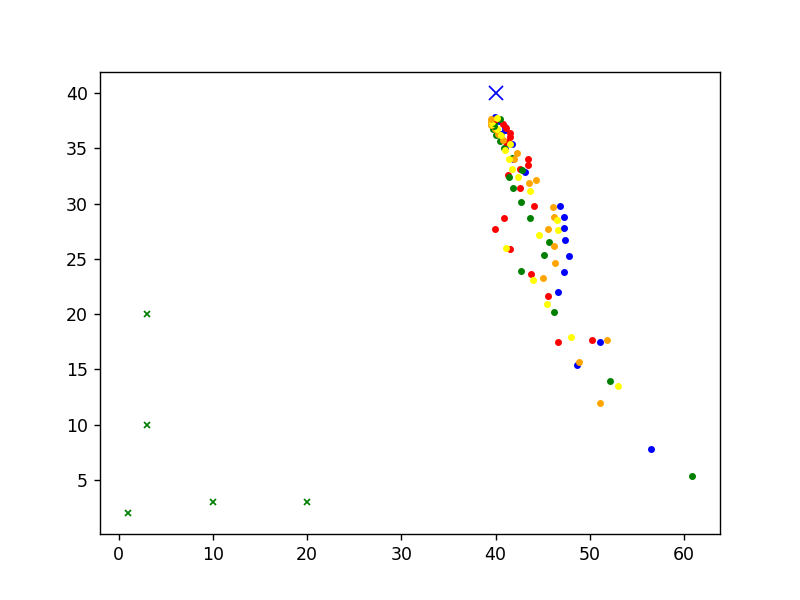

Error - 1162.04 on 1 step
Error - 1036.47 on 2 step
Error - 781.00 on 3 step
Error - 774.73 on 4 step
Error - 579.93 on 5 step
Error - 389.71 on 6 step
Error - 282.02 on 7 step
Error - 163.47 on 8 step
Error - 143.17 on 9 step
Error - 135.11 on 10 step
Error - 89.56 on 11 step
Error - 80.13 on 12 step
Error - 66.92 on 13 step
Error - 56.15 on 14 step
Error - 51.53 on 15 step
Error - 43.27 on 16 step
Error - 40.04 on 17 step
Error - 35.16 on 18 step
Error - 26.43 on 19 step


In [8]:
# ["blue", "red", "green", "orange", "yellow"]


def K(u):
    coef1 = 1 if u[0] > 0 else -1
    coef2 = 1 if u[1] > 0 else -1
    return np.array([1 / 4, 1 / 4])


spsa = SPSA(**par.__dict__)
# print("Method with Chebyshev Acceleration\n")
# spsa_cheb = spsa.run("cheb")

# print("\n\nMethod with Diagonal Scaling\n")
# spsa_inv = spsa.run("inv")

print("\n\nMain method\n")
spsa_main = spsa.run("main")

<IPython.core.display.Javascript object>


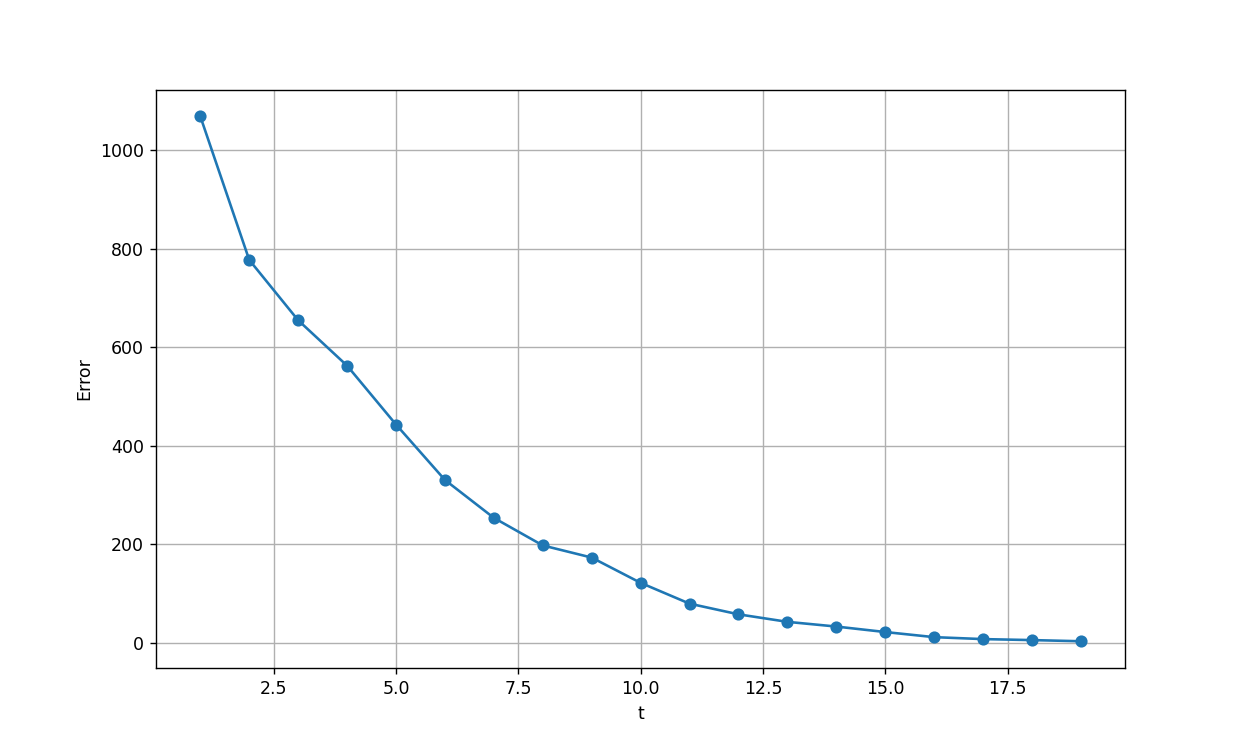

In [41]:
import matplotlib.pyplot as plt

# Предполагаем, что spsa.errors содержит ошибки по итерациям
errors = spsa.errors

# Получаем список итераций и соответствующих ошибок
iterations = list(errors.keys())
error_values = list(errors.values())

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(iterations, error_values, marker='o', linestyle='-')
#plt.yscale('log')  # Логарифмическая шкала для улучшения визуализации
#plt.title('Сходимость SPSA')
plt.xlabel('t')
plt.ylabel('Error')
plt.grid(True)
plt.show()


In [37]:
#spsa_cheb.target_err

{1: {1: 3.7606058362259804,
  2: 6.01846958820228,
  3: 0.8483225310899161,
  4: 3.684908053183824,
  5: 2.4466164927198983}}

In [38]:
#spsa_inv.target_err

{1: {1: 1.6493401064122761,
  2: 1.7288798537450358,
  3: 2.9412281168468906,
  4: 2.9741277847613428,
  5: 0.855050054682495}}

In [39]:
spsa_main.target_err

{1: {1: 3.8067715151167048,
  2: 4.669844779103506,
  3: 2.2268316558596624,
  4: 3.7327724173091337,
  5: 2.0749341422683707}}

In [12]:
ind = 2
fig = go.Figure()

# inv_er = spsa_inv.errors#inv_cond = spsa_inv.cond
# fig.add_trace(go.Scatter(x=list(inv_er.keys()),
#                          y=list(inv_er.values()),
#                         name=f"Diagonal Scaling, cond = {inv_cond:.3f}",
#                         mode="lines+markers"))

# cheb_er = spsa_cheb.errors
# cheb_cond = spsa_cheb.cond
# fig.add_trace(go.Scatter(x=list(cheb_er.keys()),
#                          y=list(cheb_er.values()),
#                         name=f"Chebyshev Acceleration, cond = {cheb_cond:.3f}",
#                         mode="lines+markers"))

main_er = spsa_main.errors
cond = spsa_main.cond
fig.add_trace(go.Scatter(x=list(main_er.keys()),
                         y=list(main_er.values()),
                        name=f"Raw, cond = {cond:.3f}",
                        mode="lines+markers"
                        ))

fig.update_layout(title_text=f'Error comparison',
                 xaxis_title="Iterations",
                 yaxis_title="Error")
    
fig.show()
fig.write_html(f"{ind} original cond - {cond} (whole matrix).html");

## 8 sensors

In [42]:
%matplotlib notebook

In [46]:
par = Parameters()

par.n = 6  # number of sensors
par.N = {i for i in range(1, par.n + 1)}  # indexes of sensors
par.s = {1: np.array([1, 2]),  # sensors coordinates
         2: np.array([3, 20]),
         3: np.array([10, 3]),
         4: np.array([20, 3]),
         5: np.array([3, 10]),
         6: np.array([3, 25]),
         7: np.array([3, 15]),
         8: np.array([3, 5]),
        }
par.s_norms = {i: sum(val * val) for i, val in par.s.items()}

par.m = 1  # nuber of targets
par.M = {i for i in range(1, par.m + 1)}  # targets indexes
par.r = {1: np.array([40, 40])}  # targets coordinates
par.theta = np.array([val for key, val in par.r.items()])  # searching for

par.meas = {1: {
    1: rho(par.r.get(1), par.s.get(1)),  # measurments  from target to sensor
    2: rho(par.r.get(1), par.s.get(2)),
    3: rho(par.r.get(1), par.s.get(3)),
    4: rho(par.r.get(1), par.s.get(4)),
    5: rho(par.r.get(1), par.s.get(5)),
    6: rho(par.r.get(1), par.s.get(6)),
     7: rho(par.r.get(1), par.s.get(7)),
#     8: rho(par.r.get(1), par.s.get(8))
}
}

par.init_coord = np.array([5, 5])  # r estimations

par.d = 2  # number of dimensions

par.beta_1 = 0.5
par.beta_2 = 0.5
par.beta = par.beta_1 + par.beta_2

par.alpha = 1 / 4
par.gamma = 1 / 4

par.b = 1

In [48]:
def generate_matrix(n):
    raw_mat = np.random.rand(n, n)
    weight = np.tril(raw_mat) + np.tril(raw_mat, -1).T

    weight = np.around(weight, 1)
    np.fill_diagonal(weight, 0)
    weight = - weight + np.diag([n-1]*n)
    return weight


par.weight = generate_matrix(6)
max_c = cond_num(par.weight)
while max_c < 7:
    par.weight = generate_matrix(6)
    if cond_num(par.weight) > max_c:
        max_c = cond_num(par.weight)
        w = par.weight
        print(max_c)

cond_num(par.weight), par.weight

3.674089392115015
3.6836129355307645
4.132385708580312
4.874244003148625
5.028866787127528
5.1910633749046715
7.45514105224964


(7.45514105224964,
 array([[ 5. , -0.9, -0.8, -0.9, -0.9, -0.9],
        [-0.9,  5. , -0.9, -0.9, -1. , -0.6],
        [-0.8, -0.9,  5. , -0.6, -0.9, -0.7],
        [-0.9, -0.9, -0.6,  5. , -0.9, -0.9],
        [-0.9, -1. , -0.9, -0.9,  5. , -0.7],
        [-0.9, -0.6, -0.7, -0.9, -0.7,  5. ]]))

In [49]:
par.weight = w

In [50]:
par.weight = np.array([[ 4. , -0.8, -0.2, -1. , -0.9, -0.9,    0,  0  ],
                       [-0.8,  4. , -0.3, -0.8, -0.6, -0.8,    0,  0  ],
                       [   0,    0,   1.,    0,    0,    0,   -1,  0  ],
                       [-1. , -0.8, -0.4,  4. , -0.9, -0.7,    0,  0  ],
                       [-0.9, -0.6, -0.6, -0.9,  4. , -0.8,    0,  0  ],
                       [-0.9, -0.8, -0.2, -0.7, -0.8,  4. ,    0,  0  ],
                       [   0,    0,  - 1,    0,    0,    0,    2, -1  ],
                       [   0,    0,    0,    0,    0,    0,   -1,  1. ]])

cond_num(par.weight)

7.138285053758199

In [51]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.15.0
ipykernel        : 6.25.0
ipywidgets       : 8.0.4
jupyter_client   : 7.4.9
jupyter_core     : 5.3.0
jupyter_server   : 1.23.4
jupyterlab       : 3.6.3
nbclient         : 0.5.13
nbconvert        : 6.5.4
nbformat         : 5.9.2
notebook         : 6.5.4
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [52]:
# !activate "C:\Users\elbor\Documents\University\Course work\spsa_scripts\venv\Scripts"


EnvironmentLocationNotFound: Not a conda environment: C:\Users\elbor\Documents\University\Course work\spsa_scripts\venv\Scripts





Main method

Previous condition number: 5.434978931516049
 New condition number: 5.434978931516049


<IPython.core.display.Javascript object>


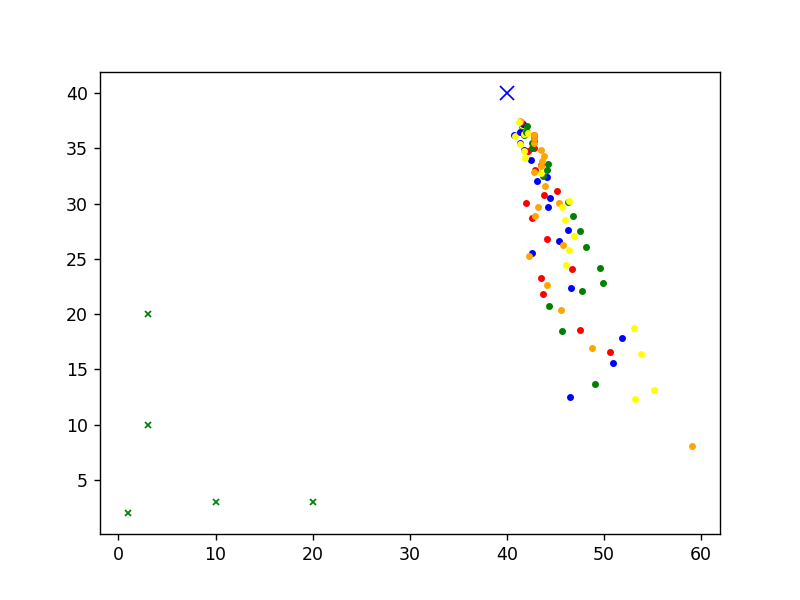

Error - 1279.92 on 1 step
Error - 968.04 on 2 step
Error - 831.72 on 3 step
Error - 642.57 on 4 step
Error - 523.34 on 5 step
Error - 310.62 on 6 step
Error - 249.84 on 7 step
Error - 206.20 on 8 step
Error - 115.70 on 9 step
Error - 82.87 on 10 step
Error - 76.09 on 11 step
Error - 54.93 on 12 step
Error - 44.59 on 13 step
Error - 34.62 on 14 step
Error - 29.35 on 15 step
Error - 17.61 on 16 step
Error - 9.64 on 17 step
Error - 8.05 on 18 step
Error - 6.53 on 19 step


In [53]:
# %matplotlib widget
# ["blue", "red", "green", "orange", "yellow"]

def K(u):
    coef1 = 1 if u[0] > 0 else -1
    coef2 = 1 if u[1] > 0 else -1
    return np.array([1 / 4, 1 / 4])


# spsa = SPSA(**par.__dict__)
# print("Method with Chebyshev Acceleration\n")
# spsa_cheb = spsa.run("cheb")

# print("\n\nMethod with Diagonal Scaling\n")
# spsa_inv = spsa.run("inv")

print("\n\nMain method\n")
spsa_main = spsa.run("main")

In [54]:
spsa_main.target_err

{1: {1: 1.1391048815071607,
  2: 1.3456419841154073,
  3: 0.9157741712815138,
  4: 1.4249094842265084,
  5: 1.7012717778444317}}

In [ ]:
import matplotlib.pyplot as plt

# Предполагаем, что spsa.errors содержит ошибки по итерациям
errors = spsa.errors

# Получаем список итераций и соответствующих ошибок
iterations = list(errors.keys())
error_values = list(errors.values())

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(iterations, error_values, marker='o', linestyle='-')
#plt.yscale('log')  # Используем логарифмическую шкалу для улучшения визуализации
#plt.title('Сходимость SPSA')
plt.xlabel('t')
plt.ylabel('Error')
plt.grid(True)
plt.show()


In [55]:
ind = 2
fig = go.Figure()

# inv_er = spsa_inv.errors
# inv_cond = spsa_inv.cond
# fig.add_trace(go.Scatter(x=list(inv_er.keys()),
#                          y=list(inv_er.values()),
#                         name=f"Diagonal Scaling, cond = {inv_cond:.3f}",
#                         mode="lines+markers"))

# cheb_er = spsa_cheb.errors
# cheb_cond = spsa_cheb.cond
# fig.add_trace(go.Scatter(x=list(cheb_er.keys()),
#                          y=list(cheb_er.values()),
#                         name=f"Chebyshev Acceleration, cond = {cheb_cond:.3f}",
#                         mode="lines+markers"))

# main_er = spsa_main.errors
# cond = spsa_main.cond
# fig.add_trace(go.Scatter(x=list(main_er.keys()),
#                          y=list(main_er.values()),
#                         name=f"Raw, cond = {cond:.3f}",
#                         mode="lines+markers"
#                         ))

fig.update_layout(title_text=f'Error comparison',
                 xaxis_title="Iterations",
                 yaxis_title="Error")
    
fig.show()
plotly.offline.iplot(fig)
fig.write_html(f"m{ind}, cond = {cond}, random.html");
